# 7. Logistic Regression

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
from sklearn import datasets

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 7.1 Prepare Data

@ Iris Data

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal(꽃잎) length in cm 
2. sepal(꽃잎) width in cm 
3. petal(꽃받침) length in cm 
4. petal(꽃받침) width in cm 
5. class: 
-- Iris Setosa (부채붓꽃)
-- Iris Versicolour (...) 
-- Iris Virginica (...)

In [3]:
iris = datasets.load_iris()

#sepal length in cm, sepal width in cm
X = iris.data[:, :2]

#-- Iris Setosa v.s. -- Iris Versicolour-- Iris Virginica

def f(x) :
    if x < 1 :
        return 0
    else :
        return 1
    
Y = np.array(list(map(f, iris.target)))

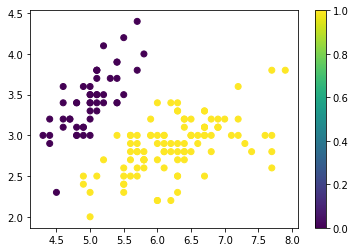

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.colorbar()
plt.show()

## 7.2 Define Model

In [5]:
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).float()
x, y

(tensor([[5.1000, 3.5000],
         [4.9000, 3.0000],
         [4.7000, 3.2000],
         [4.6000, 3.1000],
         [5.0000, 3.6000],
         [5.4000, 3.9000],
         [4.6000, 3.4000],
         [5.0000, 3.4000],
         [4.4000, 2.9000],
         [4.9000, 3.1000],
         [5.4000, 3.7000],
         [4.8000, 3.4000],
         [4.8000, 3.0000],
         [4.3000, 3.0000],
         [5.8000, 4.0000],
         [5.7000, 4.4000],
         [5.4000, 3.9000],
         [5.1000, 3.5000],
         [5.7000, 3.8000],
         [5.1000, 3.8000],
         [5.4000, 3.4000],
         [5.1000, 3.7000],
         [4.6000, 3.6000],
         [5.1000, 3.3000],
         [4.8000, 3.4000],
         [5.0000, 3.0000],
         [5.0000, 3.4000],
         [5.2000, 3.5000],
         [5.2000, 3.4000],
         [4.7000, 3.2000],
         [4.8000, 3.1000],
         [5.4000, 3.4000],
         [5.2000, 4.1000],
         [5.5000, 4.2000],
         [4.9000, 3.1000],
         [5.0000, 3.2000],
         [5.5000, 3.5000],
 

In [6]:
linear = nn.Linear(2, 1, bias = True)
sigmoid = nn.Sigmoid()

model = nn.Sequential(linear, sigmoid)

In [7]:
#Binary Cross Entropy Loss
loss = nn.BCELoss() # probability(1d), y
optimizer = optim.SGD(model.parameters(), lr=0.01)

## 7.3 Train Model

In [8]:
for step in range(2000):
    prob = model(x)
    cost = loss(prob, y.view(150, 1)) # should reshape y to fit into BCE Loss
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 200 == 0 :
        print("Step : ",step, ", Cost : ", cost.item())

Step :  0 , Cost :  0.7844293117523193
Step :  200 , Cost :  0.4872831106185913
Step :  400 , Cost :  0.42280322313308716
Step :  600 , Cost :  0.37328943610191345
Step :  800 , Cost :  0.3345266580581665
Step :  1000 , Cost :  0.30357059836387634
Step :  1200 , Cost :  0.27838146686553955
Step :  1400 , Cost :  0.257534921169281
Step :  1600 , Cost :  0.2400212287902832
Step :  1800 , Cost :  0.22511158883571625


## 7.4 Test Model

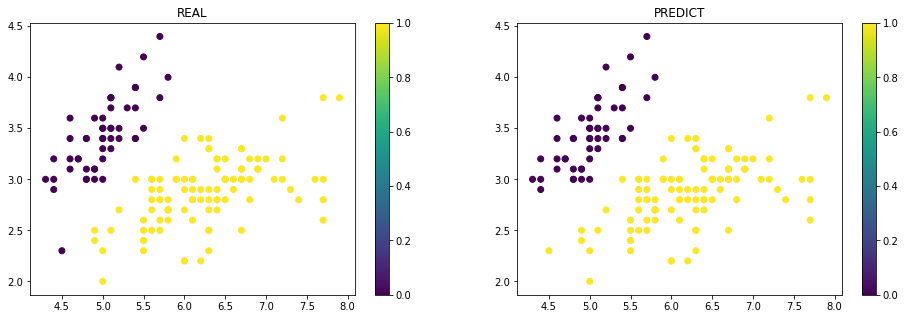

In [9]:
fig = plt.figure(figsize = (16, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y)
z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = model(x).squeeze().data.numpy() > 0.5)

plt.colorbar(z1_plot,ax=ax1)
plt.colorbar(z2_plot,ax=ax2)

ax1.set_title("REAL")
ax2.set_title("PREDICT")

plt.show()

# 추가

logistic regression을 직접 수식으로 구현   
참고링크:
* https://github.com/deeplearningzerotoall/PyTorch/blob/master/lab-05_logistic_classification.ipynb

In [10]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [11]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [12]:
# check the format of hypothesis
print('e^1 equals: ', torch.exp(torch.FloatTensor([1])))

e^1 equals:  tensor([2.7183])


In [13]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [14]:
# hypothesis function
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [15]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


In [16]:
# use in-built sigmoid function
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [17]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
torch.Size([6, 1])


In [19]:
# Compute loss(cost) function
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [20]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [22]:
import torch.nn.functional as F

In [23]:
# Use in-built binary cross entropy function

F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [24]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b) # or .mm or @
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [25]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b) # or .mm or @
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852
